# sdar algorithm

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [ ]:
def sequential_discounting_AR(data, discount_factor, learning_rate, num_iterations):
    num_obs = len(data)
    ar_model = np.zeros(num_obs)  # Initialize AR model with zeros
    ar_model[0] = data[0]  # Set the first observation as the initial model value

    for t in range(1, num_obs):
        # Update the model parameters iteratively using gradient descent
        for _ in range(num_iterations):
            error = data[t] - np.dot(discount_factor**np.arange(t, 0, -1), ar_model[:t][::-1])
            gradient = -2 * discount_factor**t * error
            ar_model[:t] -= learning_rate * gradient

        # Adjust the model parameters using sequential discounting
        ar_model[t] = (1-discount_factor) * ar_model[t-1] + discount_factor * data[t]

    return ar_model

In [59]:
np.arange(3, 0, -1)

array([3, 2, 1])

In [63]:
discount_factor = 0.3
t =3
print(np.arange(t, 0, -1))
discount_factor**np.arange(t, 0, -1) # 0.3^3, 0.3^2, 0.3^1

[3 2 1]


array([0.027, 0.09 , 0.3  ])

In [12]:
# Example usage
# data = [1, 2, 3, 4, 5]  # Example time series data
data = sns.load_dataset("flights")['passengers'].to_list()
discount_factor = 0.5  # Discount factor for sequential discounting
learning_rate = 0.1  # Learning rate for gradient descent
num_iterations = 10  # Number of iterations for gradient descent

ar_model = sequential_discounting_AR(data, discount_factor, learning_rate, num_iterations)
print(ar_model)

[162.60163452 140.72332475 133.36369393 129.24954605 124.60709072
 129.6242649  138.62518552 143.13032823 139.43410585 129.14512055
 116.54486039 117.26000797 116.12595406 121.06177078 131.03018568
 133.0148296  129.0075224  139.00387112 154.50196654 162.25097477
 160.1254706  146.56272628 130.28136254 135.14068178 140.07034166
 145.03517158 161.51758611 162.25879327 167.12939677 172.56469847
 185.78234927 192.39117464 188.19558732 175.09779366 160.54889683
 163.27444842 167.13722421 173.5686121  183.28430605 182.14215303
 182.57107651 200.28553826 215.14276913 228.57138456 218.78569228
 204.89284614 188.44642307 191.22321154 193.61160577 194.80580288
 215.40290144 225.20145072 227.10072536 235.05036268 249.52518134
 260.76259067 248.88129534 229.94064767 204.97032383 202.98516192
 203.49258096 195.74629048 215.37314524 221.18657262 227.59328631
 245.79664315 273.89832158 283.44916079 271.22458039 250.1122902
 226.5561451  227.77807255 234.88903627 233.94451814 250.47225907
 259.736129

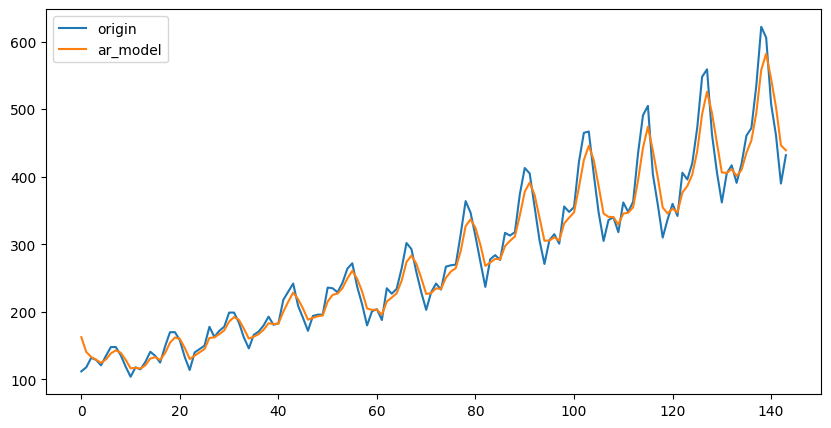

In [16]:
fig, axs = plt.subplots(figsize=(10,5))
x = [i for i in range(len(data))]
plt.plot(x, data,label='origin')
plt.plot(x, ar_model,label='ar_model')
plt.legend()

In [68]:
import numpy as np

# Example AR time series data
data = np.array([1, 2, 3, 4, 5])

# Create lagged variables
lags = 2
lagged_data = np.column_stack([np.roll(data, i) for i in range(lags+1)]) # lag 0,1,2
print(lagged_data)

[[1 5 4]
 [2 1 5]
 [3 2 1]
 [4 3 2]
 [5 4 3]]


In [67]:
[np.roll(data, i) for i in range(lags+1)]

[array([1, 2, 3, 4, 5]), array([5, 1, 2, 3, 4]), array([4, 5, 1, 2, 3])]

In [71]:
# 행, 열 바꾸기
lagged_data = np.column_stack([np.roll(data, i) for i in range(lags+1)])
print(lagged_data)

[[1 5 4]
 [2 1 5]
 [3 2 1]
 [4 3 2]
 [5 4 3]]


In [69]:
# Compute the covariance matrix
covariance_matrix = np.cov(lagged_data, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 2.5   0.   -1.25]
 [ 0.    2.5   0.  ]
 [-1.25  0.    2.5 ]]


In [72]:
# 새로운 Xt 가 들어왔을 때
# 기존 데이터
k= 3
recent_ar_data = np.array([1, 2, 3])

# 기존 평균
mean = np.mean(recent_ar_data)
print(f"기존 평균: {mean}")

# 기존 공분산 
cov_matrix = np.cov(recent_ar_data)
print(f"기존 공분산: {cov_matrix}")

기존 평균: 2.0
기존 공분산: 1.0


In [ ]:
# 새로운 데이터
new_x = 8

# 새로운 AR_data
recent_ar_data = rec
# Create lagged variables
lags = 2
lagged_data = np.column_stack([np.roll(data, i) for i in range(lags+1)]) # lag 0,1,2
print(lagged_data)

In [75]:
import numpy as np
from scipy.stats import multivariate_normal

time_series = [1, 4, 7, 9, 3, 6, 12, 15]

data = 

# 새로운 데이터
new_x = 8
time_series.append(new_x)

# Example time series data with three variables over time
data = np.array([[1, 4, 7],
                 [2, 5, 8],
                 [3, 6, 9]])

# Calculate the mean vector
mean_vector = np.mean(data, axis=0)

# Calculate the covariance matrix
covariance_matrix = np.cov(data, rowvar=False)

# covariance_matrix = np.cov(data, rowvar=True)

# Create a multivariate normal distribution object
mv_normal = multivariate_normal(mean=mean_vector, cov=covariance_matrix, allow_singular=True)

# Calculate the probability density at a given point
point = [2, 5, 8]
pdf_value = mv_normal.pdf(point)

print("Multivariate Normal Distribution:")
print("Mean Vector:", mean_vector)
print("Covariance Matrix:")
print(covariance_matrix)
print("Probability Density at Point:", pdf_value)


Multivariate Normal Distribution:
Mean Vector: [2. 5. 8.]
Covariance Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Probability Density at Point: 0.23032943298089034


In [81]:
covariance_matrix = np.cov(data, rowvar=True)
covariance_matrix

9.0

# AR Model

## k=1

In [44]:
k = 1
num_timestep = 100
time_range = np.arange(num_timestep)
phi = 0.3
y = np.zeros(num_timestep)

for t in range(k,num_timestep):
    e = np.random.randn()
    y[t] = phi * y[t-1] + e
y

array([ 0.        , -0.87533509,  0.03268783,  0.26228063,  0.8156365 ,
       -0.68748444, -1.24763847,  0.57286639,  0.02255292,  0.10900532,
        0.26131038,  0.94383258, -1.52123368, -0.94921927, -0.97740678,
        0.05103445, -1.04226963, -1.2994118 ,  0.40576696,  1.19784483,
       -1.14836772,  0.44511267,  2.08120177,  0.40800797, -0.90495468,
       -1.95354376,  0.1415241 ,  0.30427719, -0.24189764,  0.12571669,
        0.11599859, -1.49377964,  1.90953602,  0.38679864, -0.31501073,
        0.37236298, -1.06541527, -0.128785  , -0.24254419, -0.0944655 ,
       -0.19426864,  0.74788143,  0.99502238, -1.10332024,  0.7839643 ,
       -1.28715768,  0.5827958 ,  0.21653051, -1.63524333, -0.36277269,
        0.03761762,  0.63293708, -0.34276541, -0.43469319,  0.69944307,
       -0.97125072, -0.58155507, -0.19647043, -0.42758708, -1.64966211,
       -0.1414025 ,  0.39265539, -0.08518854, -0.79691391,  1.22403949,
        1.49041699,  1.09285785,  0.82841913,  0.47321244, -0.01

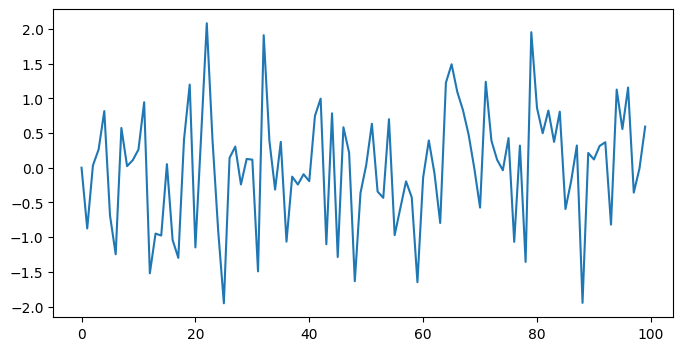

In [45]:
fig, axs = plt.subplots(figsize=(8,4))
plt.plot(time_range,y)

## k=2

In [ ]:
k = 2
coef = [0.6,-0.5]


# 개요
* {Xt: t= 1,2,3...k}: data sequence,
* {Pt: t= 1,2,3...k}: sequence of probability density function
* {X^t: t= 1,2,3...k}: should be calculated on the basis of {Pt} and {Xt}, a data Xt is input<br>
* P(Xt|Xt-k~Xt-1:θ)(Xt시계열 Xt-k ~ Xt-1 의 분포가 주어졌을 때 Xt의 확률밀도함수<br>

* Xt를 input으로 받았을 때 Parameter upgrading 진행<br>
-> new_m = (1-r) * m + r * Xt<br>
-> new_Cj = (1-r) * C + r(Xt - m)(Xt-j - m) <br>



## 삼성전자 데이터

<AxesSubplot:xlabel='Date'>

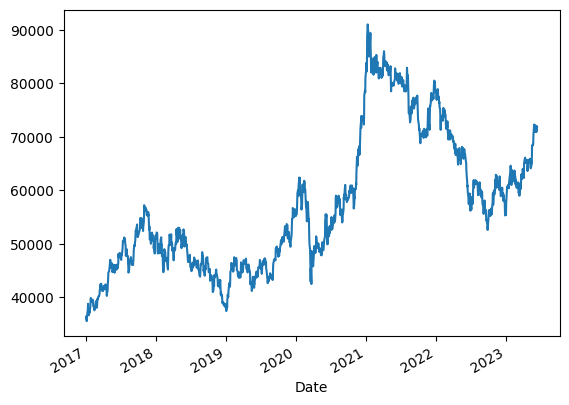

In [24]:
df = fdr.DataReader('005930', '2017')
df['Close'].plot()

## Initialization

In [ ]:
# discount factor
r = 0.005

m= 0 # 평균
c = 0 #분산 공분산
w =  # AR 계수
e = # random variable mean=0, covariance matrix를 통해 만들어지는 오차 (정규분포 N~(0,))


## parameter updating

In [ ]:
m = (1-r)* m + r*x

In [57]:
data = np.array([1, 4, 7, 3])

print(data.mean())

print(data.var())

print(data.std())

# Calculate the covariance matrix
covariance_matrix = np.cov(data, rowvar=False)
covariance_matrix

3.75
4.6875
2.165063509461097


array(6.25)

In [51]:
covariance_matrix[0][2]

1.0